In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
print("This is a linear regression example")

This is a linear regression example


In [2]:
data = pd.read_csv('data/salary_synteticdata.csv')

In [3]:
data.head()

,Age,Salary
0,20,38500
1,20,38500
2,20,38500
3,20,38500
4,20,38500


In [4]:
data.isna().sum()

Age       0
Salary    0
dtype: int64

In [5]:
data.dtypes

Age       int64
Salary    int64
dtype: object

In [6]:
data.shape

(1000, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2803ad520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2803adbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2803ad1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2803ba2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2803ba640>],
 'means': []}

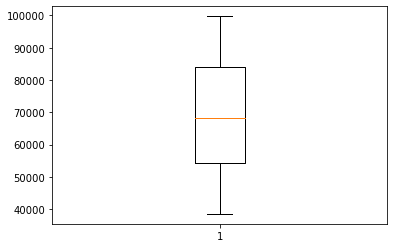

In [7]:
plt.boxplot(data['Salary']) #there are no outliers since the data is synthetic

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd290d56a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd290d64160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd290d56700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd290d64820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd290d64b80>],
 'means': []}

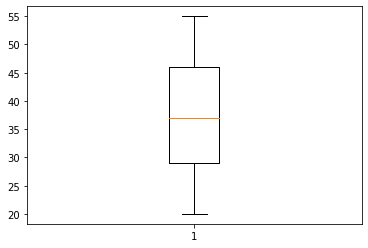

In [8]:
plt.boxplot(data['Age']) #there are no outliers since the data is synthetic

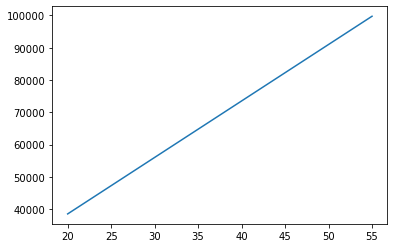

In [9]:
plt.plot(data['Age'],data['Salary']) #data has a good liner relationship

In [10]:
data.corr() #data has a correlation of 1

,Age,Salary
Age,1.0,1.0
Salary,1.0,1.0


### since there is no missing values and impurities no preprocessing is required.


### split the data into X and y
- X is the set of input variables (Age)
- y is the target variable (Salary)

In [11]:
X = data['Age']
y = data['Salary']

In [12]:
X.head()

0    20
1    20
2    20
3    20
4    20
Name: Age, dtype: int64

In [13]:
y.head()

0    38500
1    38500
2    38500
3    38500
4    38500
Name: Salary, dtype: int64

In [14]:
type(X)

pandas.core.series.Series

In [15]:
X.shape

(1000,)

### For a sklearn model the input X should be a DataFrame

In [16]:
X=X.values.reshape(X.shape[0], 1) #X should be an 2d array or dataframe

In [18]:
X.shape

(1000, 1)

# split the data into train and test sets
- Train data is used for training the model
- Test data is used to test/evaluate the model

In [19]:
from sklearn.model_selection import train_test_split #we are only importing  train_test_split function from sklearn within the class model_selection

#train_test_split is splitiing the data randomnly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #75% data will be for training and 25% data for testing

In [20]:
X_train.shape

(750, 1)

In [21]:
X_test.shape

(250, 1)

In [22]:
y_train.shape #this is a series

(750,)

In [23]:
y_test.shape

(250,)

### Use Linear Regression for modelling

In [25]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [26]:
lin_reg = LinearRegression() #creating object of LinearRegression

### fit command is used for training a model using train data.

In [29]:
lin_reg.fit(X_train,y_train) #training and fitting LR object using training data

LinearRegression()

#### coeeficients of linear regression - m

In [30]:
m  = lin_reg.coef_
m[0]

1749.999999999996

#### intercept of linear regression - c

In [31]:
c = lin_reg.intercept_
c

3500.0000000001455

### Our linear regression model will suggest that Salary = 1749.999999996*Age + 3500.0000000001455

### predicting the salary for testing data

#### predict command is used for predicting target variable for Xtest

In [32]:
ypred = lin_reg.predict(X_test)  #ypred consist of the predicted salary corresponding to X_test

#### in this context actual value will be y_test and predicted value will be ypred..
#### error is calculated in such a way that vraiation of ypred from y_test

In [33]:
ypred

array([63000., 96250., 40250., 71750., 84000., 38500., 49000., 54250.,
       43750., 92750., 61250., 89250., 85750., 85750., 82250., 64750.,
       82250., 91000., 71750., 63000., 57750., 94500., 94500., 94500.,
       66500., 91000., 85750., 42000., 40250., 38500., 45500., 78750.,
       89250., 70000., 85750., 77000., 56000., 87500., 94500., 92750.,
       77000., 38500., 78750., 59500., 77000., 47250., 49000., 64750.,
       94500., 52500., 78750., 57750., 45500., 92750., 98000., 49000.,
       75250., 38500., 64750., 98000., 38500., 52500., 50750., 77000.,
       94500., 89250., 98000., 70000., 70000., 85750., 57750., 66500.,
       38500., 49000., 61250., 99750., 42000., 61250., 49000., 40250.,
       94500., 54250., 87500., 42000., 61250., 54250., 84000., 54250.,
       78750., 63000., 85750., 98000., 45500., 77000., 99750., 99750.,
       59500., 42000., 98000., 40250., 98000., 57750., 92750., 84000.,
       70000., 38500., 77000., 92750., 89250., 73500., 56000., 49000.,
      

In [34]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 2.0682426989581877e-21


In [35]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

2.0682426989581877e-21

In [36]:
#END